In [1]:
import torch


from model_architectures import MonaiDDPM
device = "cuda:0" if torch.cuda.is_available() else "cpu"


T = 1_000     

ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/025_MNIST_basic_DDPM/checkpoints/ddpm-epoch=08-train_loss=0.0017.ckpt" # MNIST EXAMPLE> WORKED WELL.
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/026_DDPM_revamped/checkpoints/ddpm-epoch=01-train_loss=0.3648.ckpt" # 
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/027_DDPM_MONAI/checkpoints/ddpm-epoch=09-step=39210.ckpt"

model = MonaiDDPM.load_from_checkpoint(
    ckpt_path
).to(device).eval()


Error importing huggingface_hub.file_download: 'Version'


In [2]:
model

MonaiDDPM(
  (unet): DiffusionModelUNet(
    (conv_in): Convolution(
      (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (time_embed): Sequential(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): SiLU()
      (2): Linear(in_features=512, out_features=512, bias=True)
    )
    (down_blocks): ModuleList(
      (0): DownBlock(
        (resnets): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (nonlinearity): SiLU()
            (conv1): Convolution(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            )
            (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv2): Convolution(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            )
            (skip_connection):

In [3]:
nb_images = 16
with torch.no_grad():
    samples = model.sample(
        N=nb_images,
        size=64
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.71it/s]


In [15]:
image, intermediates = samples
chain = torch.cat(intermediates, dim=-1)

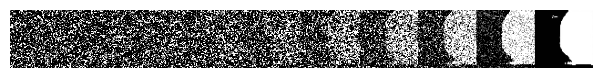

In [16]:
import matplotlib.pyplot as plt
plt.imshow(chain[0, 0].cpu(), vmin=0, vmax=1, cmap="gray")
plt.tight_layout()
plt.axis("off")
plt.show()

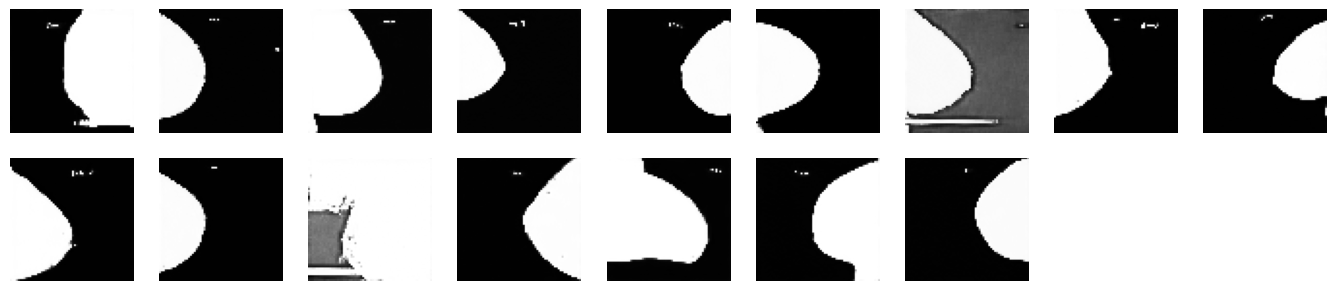

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 17))
for i in range(16):
    plt.subplot(9, 9, 1 + i)
    plt.axis('off')
    plt.imshow(image[i].squeeze(0).clip(0, 1).data.cpu().numpy(),
               cmap='gray')
# plt.savefig(f'inference/samples.png')